# 【Python】GoogleColab上でNetworkXによる日本語の共起ネットワークを文字化けせずにプロット

url: https://tkstock.site/2022/08/24/python-googlecolab-networkx-matplotlib-japanese-networkx-plot/

old: https://www.dskomei.com/entry/2019/04/07/021028

    今回はテキストデータから共起ネットワークをプロットします。
    そもそも共起ネットワークとは同時に出現する単語の組み合わせをエッジで繋ぎ、単語間の関係をネットワークで表したものです。
    これにより、文章内の単語の関連性を可視化できます。

    共起ネットワークはPythonだと「networkx」というライブラリを使って簡単に実装することができます。

    ・実行環境

    GoogleColab
    Python3.7
    networkx2.6.3

## データの取得と加工

    今回使用するデータは、青空文庫 Aozora Bunkoにある福沢諭吉の『学問のすすめ』です。
    すでにテキストファイル化したものはをGITからダウンロードしてgooglecolabの一番上のディレクトリにアップロードして配置してください。

url: https://www.aozora.gr.jp/

url: https://github.com/beginerSE/networkx_sample


## ライブラリのインストール

In [1]:
!pip install mecab-python3 unidic-lite
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
aptitude is already the newest version (0.8.13-3ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
mecab is already installed at the requested version (0.996-14build9)
libmecab-dev is already installed at the requested version (0.996-14build9)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-3)
git is already installed at the requested version (1:2.34.1-1ubuntu1.10)
make is already installed at the requested version (4.3-4.1build1)
curl is already installed at the requested version (7.81.0-1ubuntu1.15)
xz-utils is already installed at the requested version (5.2.5-2ubuntu1)
file is already installed at the requested version (1:5.41-3ubuntu0.1)
mecab is already installed at the requested version (0.996-14build9)
libmecab-dev is already installed at the requested version (0.996-14build9)
mecab-ipadic-utf8 is already installed at the re

    これらのコードは、MeCabと関連する辞書をインストールし、MeCabをPythonから利用可能にするための手順です。
    以下にそれぞれのステップについて説明します。

    !pip install mecab-python3 unidic-lite: MeCabをPythonから利用するためのPythonバインディングである mecab-python3 と、形態素解析のための辞書である unidic-lite をインストールしています。
    これらのパッケージは、MeCabをPythonで利用するために必要なものです。

    !apt install aptitude: aptitude パッケージをインストールしています。
    aptitude は、UbuntuやDebianなどのLinuxシステムでパッケージを管理するためのツールです。

    !aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y: aptitude を使用して、MeCabや関連するパッケージをインストールしています。
    これらはMeCabの基本的な実行環境や辞書のための依存関係です。

    !pip install mecab-python3==0.7: 特定のバージョン（0.7）の mecab-python3 パッケージをインストールしています。
    バージョンを指定しているのは、互換性のあるバージョンを使用するためです。

    !apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null: apt-get を使用して、MeCabと関連するパッケージを再度インストールしています。> /dev/null は標準出力を無視するためのコマンドで、冗長な出力を表示しないようにしています。

    !git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null: Neologdと呼ばれるMeCabの辞書をクローンしています。
    Neologdは新しい単語や固有名詞を収録した辞書で、MeCabの精度を向上させます。

    !echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1: Neologdのインストールスクリプトを実行しています。
    -n オプションは、システム辞書としてインストールすることを指定しています。

    !pip install mecab-python3 > /dev/null: 最終的に、MeCabをPythonから利用するための mecab-python3 パッケージを再度インストールしています。

    !ln -s /etc/mecabrc /usr/local/etc/mecabrc: シンボリックリンクを作成しています。
    これは、MeCabの設定ファイルへのパスを指定するために行われ、エラーを回避するのに役立ちます。

    これらのスクリプトは、MeCabのセットアップと必要な辞書のインストールを行っています。
    形態素解析を行うためには、これらのステップが必要です。

## 日本語フォントのインストール

  次にMatplotlibの日本語フォントをインストールしてデフォルトの文字フォントとして設定します。

In [2]:
!apt-get -y install fonts-ipafont-gothic
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


    以下のコードは、Google Colab環境で日本語のフォントを設定して、
    Matplotlibで日本語を含むグラフやプロットを描画するための手順です。

    !apt-get -y install fonts-ipafont-gothic: これは、IPAフォント（ipafont）のゴシック体をインストールするコマンドです。
    IPAフォントは、日本語のフォントであり、これによりMatplotlibが日本語文字を正しく描画できるようになります。

    plt.rcParams['font.family'] = 'IPAPGothic': これはMatplotlibのフォントの設定です。
    'IPAPGothic' フォントファミリーを使用するように指定しています。
    これにより、Matplotlibで描画されるテキストがIPAフォントのゴシック体で表示されます。

    この手順により、Matplotlibで日本語を含むグラフやプロットを描画する際に、
    正しいフォントが使用され、文字が正しく表示されるようになります。

In [3]:
!pip install mojimoji
!pip install neologdn

    以下のコードは、Pythonのパッケージ mojimoji と neologdn をインストールするためのものです。
    これらのパッケージは、文字列の正規化や変換を行うためのツールです。

    !pip install mojimoji: mojimoji パッケージは、文字列の正規化や変換を行うためのライブラリです。
    例えば、全角文字を半角文字に変換する機能や、大文字を小文字に変換する機能などが含まれています。

    !pip install neologdn: neologdn パッケージは、形態素解析の前処理に使用されます。
    新語や固有名詞を正規化して、形態素解析の精度を向上させることができます。
    Neologdと組み合わせて使用されることがあります。

    これらのパッケージをインストールすることで、テキストデータの前処理や正規化を効果的に行うことができます。
    例えば、日本語のテキストデータをクリーニングして、形態素解析や分析の際に適切な入力データを得ることができます。

## ライブラリの読み込み

In [4]:
# !pip install networkx==2.6.0
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.6.3
# from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np
import matplotlib
from collections import defaultdict, Counter
from copy import copy, deepcopy
from pathlib import Path
import collections
import urllib.request
import MeCab
import mojimoji
import neologdn
import unicodedata
import itertools
import networkx as nx
%matplotlib inline

    from wordcloud import WordCloud: WordCloud ライブラリは、テキストデータからワードクラウド（単語の出現頻度を視覚的に表現したもの）を生成するためのツールです。
    単語の頻度に応じて、単語が大きさや色で表示され、重要な単語が強調されます。

    import re: re モジュールは、正規表現を使用して文字列の操作や検索を行うためのライブラリです。
    テキストデータのパターンマッチングや置換などに利用されます。

    from collections import defaultdict, Counter: collections モジュールから defaultdict と Counter をインポートしています。
    defaultdict は辞書型のサブクラスで、初期値を持つ辞書を作成します。
    Counter は要素の出現回数を数えるためのクラスです。

    from copy import copy, deepcopy: copy モジュールから copy と deepcopy をインポートしています。
    これらはオブジェクトの浅いコピーと深いコピーを行うための関数です。

    from pathlib import Path: pathlib ライブラリは、ファイルパスの操作や処理を簡単に行うためのツールです。
    Path クラスを使用して、ファイルやディレクトリのパスを操作します。

    import collections: collections モジュールは、標準のデータ型である辞書やリストをサポートするためのライブラリです。
    特に Counter クラスなどが有用です。

    import urllib.request: urllib.request モジュールは、URLからデータをダウンロードするためのライブラリです。
    Web上のデータにアクセスする際に使用されます。

    import MeCab: MeCab は、形態素解析エンジンで、日本語のテキストを形態素（単語や品詞）に分割するために使用されます。

    import mojimoji: mojimoji ライブラリは、文字列の正規化や変換を行うためのツールです。例えば、全角を半角に変換するなどが可能です。

    import neologdn: neologdn ライブラリは、形態素解析の前処理に使用されます。
    新語や固有名詞を正規化して、形態素解析の精度を向上させることができます。

    import unicodedata: unicodedata モジュールは、Unicode 文字列に対する基本的な操作を提供します。
    文字の正規化やカテゴリの取得などが可能です。

    import itertools: itertools モジュールは、イテレータや反復処理に関する関数を提供するライブラリです。
    例えば、組み合わせの生成などが可能です。

    import networkx as nx: networkx ライブラリは、ネットワークやグラフの操作、可視化、分析に使用されるライブラリです。
    グラフ理論の概念をサポートし、さまざまなネットワーク関連の処理が可能です。

    これらのモジュールやライブラリは、データ処理、可視化、自然言語処理、ネットワーク分析など、様々なタスクに利用されます。

## データの取得と加工

In [5]:
def get_stopword_lsit(write_file_path):

    if not write_file_path.exists():
        url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
        urllib.request.urlretrieve(url, write_file_path)

    with open(write_file_path, 'r', encoding='utf-8') as file:
        stopword_list = [word.replace('\n', '') for word in file.readlines()]

    return stopword_list

    この関数は、日本語のストップワードリストを取得するためのものです。
    具体的な手順は以下の通りです。

    ※ストップワードリストは、自然言語処理の際に特定の文書や文章から除外するべき不要な単語や文字列のリストです。
    これらの単語は一般的に情報を持たず、文脈を理解する上で役に立たないため、除外することで解析や処理の効率を向上させることができます。
    例えば、「の」「こと」「これ」などが一般的な日本語のストップワードです。

    1.write_file_path で指定されたファイルパスが存在しない場合、指定したURLから日本語のストップワードリストをダウンロードして指定されたファイルパスに保存します。
    これは、初回のみの処理で、以降は既にファイルが存在している場合はスキップされます。

    if not write_file_path.exists():
        url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
        urllib.request.urlretrieve(url, write_file_path)

    write_file_path.exists() は、指定されたファイルパス (write_file_path) に対応するファイルが存在するかどうかを判定するメソッドです。
    具体的には、Path オブジェクトなどを使ってファイルパスを表現し、そのファイルが存在するかどうかを確認します。
    exists() メソッドは、ファイルが存在すれば True を、存在しなければ False を返します。

    urllib.request.urlretrieve(url, write_file_path) は、
    指定された URL からデータをダウンロードし、それを指定されたファイルパスに保存する関数です。
    
    2.ダウンロードしたか、既に存在していたファイルを開いて、その中に含まれるストップワードをリストとして読み込みます。

    with open(write_file_path, 'r', encoding='utf-8') as file:
        stopword_list = [word.replace('\n', '') for word in file.readlines()]

    この例では、with ステートメントを使ってファイルを開き、処理が終わったら自動的にファイルを閉じるようにしています。
    file はファイルへのファイルオブジェクトとして扱われます。読み込んだファイルの内容は file.read() で取得できます。

    file.readlines() は、ファイルからすべての行を読み込んで、各行を文字列の要素とするリストを返すメソッドです。
    ここでは、各行の改行文字を削除し、クリーンな形でリストに格納しています。

    3.最終的に、取得したストップワードのリストを返します。
    
    return stopword_list

    この関数を利用することで、日本語の自然言語処理タスクにおいて一般的に無視されるべき単語（ストップワード）のリストを簡単に取得できます。

In [6]:
def get_noun_words_from_sentence(sentence, mecab, stopword_list=[]):
    return [
        x.split('\t')[0] for x in mecab.parse(sentence).split('\n') if len(x.split('\t')) > 1 and \
         '名詞' in x.split('\t')[3] and x.split('\t')[0] not in stopword_list
    ]

    この関数は、与えられた文 (sentence) から名詞を抽出するためのものです。以下に各要素の説明を示します。

    sentence: 名詞を抽出したい日本語の文や文章。
    mecab: MeCabのインスタンス。形態素解析を行うための MeCab インスタンスが関数の引数として渡されることを期待しています。
    stopword_list: ストップワードのリスト。抽出した名詞の中で除外する単語があれば、このリストに含まれているかどうかを確認します。
    
    関数の具体的な処理は以下の通りです：
    mecab.parse(sentence): MeCab を使って、与えられた文を形態素解析します。
    これにより、文が形態素ごとに分割され、各形態素の詳細な情報がタブ区切りで得られます。

    for x in mecab.parse(sentence).split('\n'): 形態素解析結果を行ごとに分割し、各行に対して以下の処理を行います。
    
    x.split('\t'): タブで分割し、各要素を取得します。これにより、各形態素の情報がリストとして得られます。

    len(x.split('\t')) > 1: 分割した結果が2つ以上の要素を持っているか確認します。これが False ならスキップします。

    '名詞' in x.split('\t')[3]: 形態素の品詞情報が '名詞' であるかどうかを確認します。

    x.split('\t')[0] not in stopword_list: 形態素の表層形（実際の単語）がストップワードリストに含まれていないかどうかを確認します。

    最終的に、上記の条件を満たす場合、名詞として抽出された単語をリストに追加します。

    関数が返す値は、文から抽出された名詞のリストです。
    この関数を利用することで、与えられた文から特定の条件を満たす名詞を取り出すことができます。

In [7]:
def split_sentence(sentence, mecab, stopword_list):
    sentence = neologdn.normalize(sentence)
    sentence = unicodedata.normalize("NFKC", sentence)
    words = get_noun_words_from_sentence(
        sentence=sentence, mecab=mecab, stopword_list=stopword_list
    )
    words = list(map(lambda x: re.sub(r'\d+\.*\d*', '0', x.lower()), words))
    return words

    この関数は、与えられた文 (sentence) を前処理し、それから名詞を抽出して返すものです。以下に各要素の説明を示します。

    sentence: 前処理と名詞抽出を行う対象の文。
    mecab: MeCabのインスタンス。
    形態素解析を行うための MeCab インスタンスが関数の引数として渡されることを期待しています。
    stopword_list: ストップワードのリスト。
    抽出した名詞の中で除外する単語があれば、このリストに含まれているかどうかを確認します。

    関数の具体的な処理は以下の通りです：
    neologdn.normalize(sentence): neologdn を使用して、文の正規化を行います。
    これにより、文中の表記揺れや統一されていない表現を正規化します。

    unicodedata.normalize("NFKC", sentence): Unicodeの正規化を行います。全角文字を半角に変換するなど、文字の標準化を行います。

    Unicodeには複数の正規化フォームがありますが、その一つに "NFKC" があります。これは、合成文字（例：アクセント記号など）を分解し、半角・全角の変換などを行う標準の正規化フォームです。

    具体的には、"NFKC" による正規化は以下のような変換を行います：
    1.合成文字を分解する。
    2.全角数字を半角数字に変換する。
    3.全角アルファベットを半角アルファベットに変換する。
    4.全角カタカナを半角カタカナに変換する。

    これにより、同じ意味を持つ文字列でも異なる表現が統一され、文字列の一貫性が向上します。
    特に、日本語のテキスト処理においては、半角・全角の揺れや合成文字の分解が必要な場面があります。

    get_noun_words_from_sentence: 上記で説明した関数を用いて、前処理された文から名詞を抽出します。

    list(map(lambda x: re.sub(r'\d+\.*\d*', '0', x.lower()), words)): 抽出された名詞に対して、数字を'0'に置換し、小文字に変換します。
    
    (lambda x: re.sub(r'\d+\.*\d*', '0', x.lower()) という無名関数を使って、words リスト内の各要素に対して数値の正規化と小文字変換が行われています。
    この処理は map 関数を使って words リストの各要素に適用され、その結果を新しいリストとして取得しています。

    これにより、数字や大文字小文字の違いによる語彙の揺れを減少させます。

    r'\d+\.*\d*' は正規表現パターンを表しています。この正規表現は、数字のパターンを指定しています。以下に各要素の説明を示します：

    \d+: 1つ以上の数字にマッチします。
    \.*: 0個以上のピリオド (.) にマッチします。
    ピリオドはエスケープされているため、文字としてのピリオドとして解釈されます。
    \d*: 0個以上の数字にマッチします。

    この正規表現パターン全体で、連続する数字とピリオドがマッチします。
    具体的には、整数や小数などの数字の表現に一致します。
    アルファベットや記号を含む文字列にはマッチしません。
    この正規表現は数値を抽出したり、数値の正規化を行う際に利用されることがあります。

    re.sub は、Pythonの re モジュールに含まれる正規表現を用いた文字列の置換を行う関数です。
    この関数は、指定された正規表現パターンにマッチする部分を指定した文字列で置き換えます。

    具体的な使い方は以下の通りです：
    re.sub(pattern, replacement, string)
    pattern: 置換対象を特定する正規表現パターンです。
    replacement: マッチした部分を置き換える文字列です。
    string: 置換を行う対象の文字列です。

    例えば、次のコードは文字列内の数字をすべて "0" に置き換えます：
    import re
    text = "The price is $30.50 and the quantity is 3."
    result = re.sub(r'\d+\.*\d*', '0', text)
    print(result)

    The price is $0 and the quantity is 0

    上記の例では、r'\d+\.*\d*' という正規表現パターンが数値にマッチし、それを "0" に置き換えています。

    関数が返す値は、前処理と名詞抽出が行われた後の名詞のリストです。このリストは、後続の処理や解析に使用できる形式に整形されています。

In [8]:
with open('/content/gakumonno_susume.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

# mecab = MeCab.Tagger()
mecab = MeCab.Tagger('-Ochasen')

stopword_list = get_stopword_lsit(Path('/content/stopword_list.txt'))
# stopword_list=['ここ', 'あれ','ん','よう','0','こと','さん','の', 'ん','これ','もの','そう']

noun_sentences = []
for sentence in sentences:
    noun_sentences.append(
        split_sentence(sentence=sentence, mecab=mecab, stopword_list=stopword_list)
    )

for words in noun_sentences[:5]:
    print(words)

['天']
['天', 'みな', '位', '貴', '賤', 'きせん', '上下', '差別', '万物', '霊', '身', '心', '働き', '天地', '物', '資', '衣食住', '自由自在', '妨げ', '安楽', 'この世', '趣意']
['人間', '世界', 'おろか', '貴人', '下人', '有様', '雲', '泥', 'ど', 'ろ', '相違']
['次第', '明らか']
['実', '語', '教', 'ご', 'きょう', '智', '智', '愚人']


In [9]:
display(sentences[:5])
display(stopword_list[:5])
display(words[:5])

['「天は人の上に人を造らず人の下に人を造らず」と言えり',
 'されば天より人を生ずるには、万人は万人みな同じ位にして、生まれながら貴賤《きせん》上下の差別なく、万物の霊たる身と心との働きをもって天地の間にあるよろずの物を資《と》り、もって衣食住の用を達し、自由自在、互いに人の妨げをなさずしておのおの安楽にこの世を渡らしめ給うの趣意なり',
 'されども今、広くこの人間世界を見渡すに、かしこき人あり、おろかなる人あり、貧しきもあり、富めるもあり、貴人もあり、下人もありて、その有様雲と泥《どろ》との相違あるに似たるはなんぞや',
 'その次第はなはだ明らかなり',
 '『実語教《じつごきょう》』に、「人学ばざれば智なし、智なき者は愚人なり」とあり']

['あそこ', 'あたり', 'あちら', 'あっち', 'あと']

['実', '語', '教', 'ご', 'きょう']

    このコードは、テキストファイル gakumonno_susume.txt から文章を読み込み、それを文に分割し、MeCabを使用して名詞のみを抽出する処理を行っています。以下に、コードの各部分について詳細を説明します。

    extend と append は、リストに要素を追加するためのメソッドですが、挙動には重要な違いがあります。
    
    append メソッド:引数として渡された要素そのものをリストの最後に追加します。
    例えば、list.append(x) はリストの末尾に要素 x を追加します。
    fruits = ['apple', 'banana']
    fruits.append('orange')
    print(fruits)
    出力:['apple', 'banana', 'orange']
    
    extend メソッド:
    extend メソッドは、引数として渡された iterable (反復可能なオブジェクト) の要素をリストに追加します。
    つまり、引数がリストである場合、そのリストの要素が追加されます。
    例えば、list.extend(iterable) はリストに iterable の要素を追加します。
    
    fruits = ['apple', 'banana']
    more_fruits = ['orange', 'grape']
    fruits.extend(more_fruits)
    print(fruits)
    出力:['apple', 'banana', 'orange', 'grape']

    extend は、リストの要素を一つずつではなく、まとめて追加します。

    MeCabの設定:
    mecab = MeCab.Tagger('-Ochasen')
    MeCabを使用するための設定を行います。'-Ochasen' オプションは、MeCabの出力形式を ChaSen 互換形式に設定しています。

    ストップワードリストの取得:
    stopword_list = get_stopword_lsit(Path('/content/stopword_list.txt'))
    get_stopword_lsit 関数を使用して、ストップワードリストを取得します。
    このリストには除外したい単語が含まれています。

    共起ネットワークを作るので一語しかない文章を取り除き、更にノイズとなる「見出し」の単語が含まれている文章も削除しています。

In [10]:
noun_sentences = list(filter(lambda x: len(x) > 1 and '見出し' not in x, noun_sentences))

In [11]:
noun_sentences[:5]

[['天',
  'みな',
  '位',
  '貴',
  '賤',
  'きせん',
  '上下',
  '差別',
  '万物',
  '霊',
  '身',
  '心',
  '働き',
  '天地',
  '物',
  '資',
  '衣食住',
  '自由自在',
  '妨げ',
  '安楽',
  'この世',
  '趣意'],
 ['人間', '世界', 'おろか', '貴人', '下人', '有様', '雲', '泥', 'ど', 'ろ', '相違'],
 ['次第', '明らか'],
 ['実', '語', '教', 'ご', 'きょう', '智', '智', '愚人'],
 ['賢人', '愚人']]

    list(filter(lambda x: len(x) > 1 and '見出し' not in x, noun_sentences)) は、リスト noun_sentences から特定の条件に合致する要素だけを抽出する処理を行っています。
    ここでは filter 関数と無名関数 (lambda 関数) を組み合わせています。

    具体的には、次のような処理が行われています：
    len(x) > 1: 各要素 x の長さが 1 より大きいかどうかを確認します。
    '見出し' not in x: 各要素 x に文字列 '見出し' が含まれていないかどうかを確認します。
    上記の2つの条件が共に真の場合、その要素は結果のリストに含まれます。

    これでデータの取得と前処理は完了です。

## 共起ネットワークのためのデータ整形

    今回作る共起ネットワークは、同じ文章に出現する単語を共起としているため、文章内での単語の組み合わせを作ります。

In [12]:
combination_sentences = [list(itertools.combinations(words, 2)) for words in noun_sentences]
combination_sentences = [[tuple(sorted(combi)) for combi in combinations] for combinations in combination_sentences]

tmp = []
for combinations in combination_sentences:
    tmp.extend(combinations)

combination_sentences = tmp
combination_sentences[:5]

[('みな', '天'), ('位', '天'), ('天', '貴'), ('天', '賤'), ('きせん', '天')]

In [13]:
display(len(noun_sentences))
display(len(combination_sentences))

display(noun_sentences[:5])
display(combination_sentences[:5])

1485

95464

[['天',
  'みな',
  '位',
  '貴',
  '賤',
  'きせん',
  '上下',
  '差別',
  '万物',
  '霊',
  '身',
  '心',
  '働き',
  '天地',
  '物',
  '資',
  '衣食住',
  '自由自在',
  '妨げ',
  '安楽',
  'この世',
  '趣意'],
 ['人間', '世界', 'おろか', '貴人', '下人', '有様', '雲', '泥', 'ど', 'ろ', '相違'],
 ['次第', '明らか'],
 ['実', '語', '教', 'ご', 'きょう', '智', '智', '愚人'],
 ['賢人', '愚人']]

[('みな', '天'), ('位', '天'), ('天', '貴'), ('天', '賤'), ('きせん', '天')]

    このコードは、文章内の名詞から2つの単語の組み合わせを作成しています。
    以下に、コードの各部分について具体的な説明をします。

    itertools.combinations の使用:
    combination_sentences = [list(itertools.combinations(words, 2)) for words in noun_sentences]
    itertools.combinations(iterable, r) は、iterable から r 個の要素の組み合わせを生成する関数です。
    このコードでは、各文の名詞リスト (noun_sentences) から2つの単語の組み合わせを生成しています。

    重複の排除とソート:
    combination_sentences = [[tuple(sorted(combi)) for combi in combinations] for combinations in combination_sentences]
    各組み合わせ内の単語をソートし、重複を排除しています。
    tuple(sorted(combi)) は、組み合わせ内の単語をソートしてタプルに変換しています。

    重複を排除するための処理を具体的に説明すると、各 combinations は itertools.combinations によって生成された組み合わせのリストです。
    そして、この内側のリスト内の各 combi は2つの単語からなる組み合わせです。

    tuple(sorted(combi)) は、各組み合わせ内の単語をソートしてタプルに変換しています。これにより、単語の順序が異なる場合でも同じタプルになります。
    
    この操作により、重複が排除されます。たとえば、('apple', 'banana') と ('banana', 'apple') は同じタプルとして扱われます。
    
    この処理を通じて、各文の組み合わせにおいて、単語の順序が異なる場合でも同じ組み合わせを得ることができます。

    平坦化:
    tmp = []
    for combinations in combination_sentences:
        tmp.extend(combinations)
    combination_sentences = tmp
    リストのネストを解除して平坦なリストにしています。
    これにより、以前のステップで生成された各文の組み合わせが一つのリストに結合されます。

    平坦化 (flattening) は、多次元のリストやネストされた構造を1次元のリストに変換する操作を指します。
    ユニークにするとは一般的には関係ありませんが、平坦化の結果として重複した要素が含まれないようにする場合もあります。

    最終的に、combination_sentences は、文章内の名詞から生成された2つの単語の組み合わせのリストになります。
    combination_sentences[:5] はその最初の5つを表示しています。

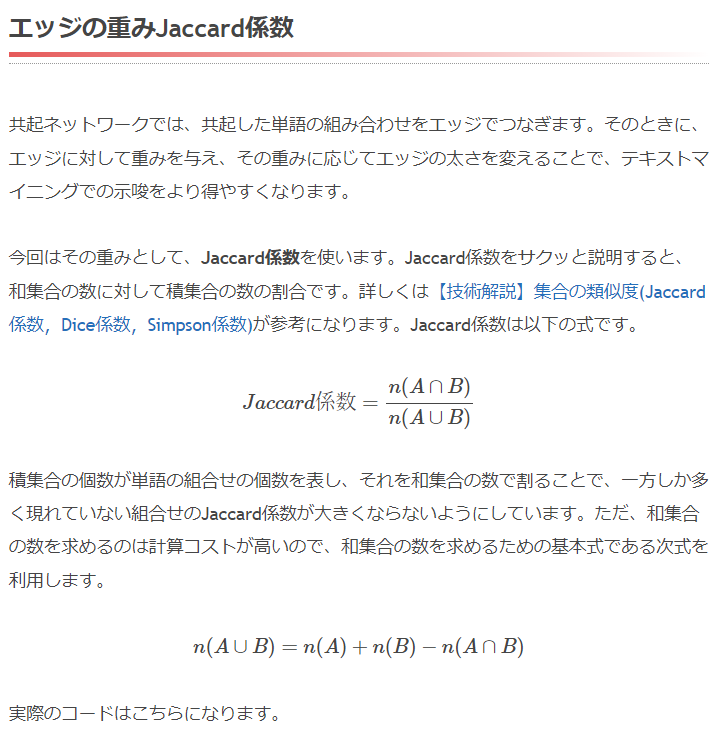

url: https://mieruca-ai.com/ai/jaccard_dice_simpson/

In [14]:
def make_jaccard_coef_data(combination_sentences):

    combi_count = collections.Counter(combination_sentences)

    word_associates = []
    for key, value in combi_count.items():
        word_associates.append([key[0], key[1], value])

    word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'intersection_count'])

    words = []
    for combi in combination_sentences:
        words.extend(combi)

    word_count = collections.Counter(words)
    word_count = [[key, value] for key, value in word_count.items()]
    word_count = pd.DataFrame(word_count, columns=['word', 'count'])

    word_associates = pd.merge(
        word_associates,
        word_count.rename(columns={'word': 'word1'}),
        on='word1', how='left'
    ).rename(columns={'count': 'count1'}).merge(
        word_count.rename(columns={'word': 'word2'}),
        on='word2', how='left'
    ).rename(columns={'count': 'count2'}).assign(
        union_count=lambda x: x.count1 + x.count2 - x.intersection_count
    ).assign(jaccard_coef=lambda x: x.intersection_count / x.union_count).sort_values(
        ['jaccard_coef', 'intersection_count'], ascending=[False, False]
    )

    return word_associates

    この関数は、Jaccard係数を用いて単語の共起関係を計算し、その結果をデータフレームとして返すものです。以下に、各部分の具体的な説明を行います。

    combi_count: 共起ペアの出現回数をカウントする
    word_associates: 共起ペアとその出現回数をデータフレームに格納する
    items()は、Pythonの辞書（dict）オブジェクトに対して使用されるメソッドで、辞書のキーと値のペアを取得するために利用されます。
    このメソッドは、各アイテムがキーと値の2つの要素から構成されるタプルを含むイテレータを返します。

    word_count: 単語ごとの出現回数をカウントする
    word_associates: 単語ごとの出現回数を持つデータフレームに、共起ペアの出現回数を結合する
    assignメソッドは、PandasのDataFrameに新しい列を追加するためのメソッドです。

    この関数は、与えられた共起ペアのリストから各単語の共起情報を計算し、それを含むデータフレームを返します。

In [15]:
jaccard_coef_data = make_jaccard_coef_data(combination_sentences)

jaccard_coef_data.head(10)

,word1,word2,intersection_count,count1,count2,union_count,jaccard_coef
5137,小幡,篤次郎,1,1,1,1,1.000000
8267,売り言葉,買い言葉,1,1,1,1,1.000000
29543,不可思議,妙,1,2,2,3,0.333333
30301,仏書,罪業,1,2,2,3,0.333333
30302,仏書,女人,1,2,2,3,0.333333
30303,女人,罪業,1,2,2,3,0.333333
30306,大罪,科人,1,2,2,3,0.333333
31285,破廉恥,鉄面皮,1,1,3,3,0.333333
34234,恩賜,陰徳,1,2,2,3,0.333333
51909,キリン,フラン,1,2,2,3,0.333333


    Jaccard係数を算出できましたが、実行結果をよく見ると、Jaccard係数が高い単語の組み合わせは、単語の出現回数が少ないものが多いようです。
    まぁ、単語の組み合わせの強さを見るためには必要なデータですが、文章全体を把握するという観点では、ノイズかもしれません。
    共起ネットワークを作る際は、単語の出現回数を考慮したほうが良いでしょう。

## Jaccard係数の分布

    エッジの重みであるJaccard係数を算出できたので、どの値が多いのかの分布を見てみます。


In [16]:
group_values = [0, 0.01, 0.02, 0.04, float('inf')]

plot_data = jaccard_coef_data.copy()
plot_data['group_num'] = 0
group_names = []

for i in range(len(group_values) - 1):

    plot_data['group_num'] = plot_data.apply(
        lambda x: i + 1 if group_values[i] <= x['jaccard_coef'] and x['jaccard_coef'] < group_values[i + 1] else x['group_num'],
        axis=1
    )
    group_names.append((group_values[i], group_values[i + 1]))

plot_data = plot_data.groupby('group_num')['jaccard_coef'].count().reset_index().rename(
    columns={'jaccard_coef': 'n_combi'}
).assign(rate=lambda x: x.n_combi / x.n_combi.sum()).assign(
    rate_cumsum=lambda x: x.rate.cumsum()
)

plot_data = pd.concat([
    pd.DataFrame(group_names, columns=['jaccard_lower', 'jaccard_upper']),
    plot_data
], axis=1)

In [17]:
display(group_names)
display(plot_data)

[(0, 0.01), (0.01, 0.02), (0.02, 0.04), (0.04, inf)]

,jaccard_lower,jaccard_upper,group_num,n_combi,rate,rate_cumsum
0,0.00,0.01,1,57028,0.794041,0.794041
1,0.01,0.02,2,10411,0.144960,0.939000
2,0.02,0.04,3,3263,0.045433,0.984433
3,0.04,inf,4,1118,0.015567,1.000000


    このコードは、Jaccard係数のデータを特定の範囲ごとにグループ化し、そのグループごとの統計情報を取得するための処理を行っています。以下に具体的な説明を示します：

    group_valuesには、Jaccard係数を特定の範囲に分割するための閾値が格納されています。
    例えば、0から0.01、0.01から0.02、...といった範囲に分割するための数値がリストとして格納されています。また、float('inf')は正の無限大を表します。

    group_numカラムを作成し、初期値を0に設定します。このカラムは後でJaccard係数を所定の範囲に分類するのに使用されます。

    group_namesは各範囲の名前（jaccard_lowerとjaccard_upper）を格納するためのリストです。この情報は後で統計情報をまとめる際に使用されます。

    forループを使用して、各範囲ごとにgroup_numを更新し、範囲内に収まる係数に対してグループ番号を付与します。
    各範囲はgroup_values[i]以上かつgroup_values[i + 1]未満の範囲です。

    plot_dataをgroup_numでグループ化し、各グループ内の組み合わせ数（n_combi）を数えます。

    rateカラムを計算して、各グループの組み合わせ数が総数に占める割合を求めます。

    rate_cumsumカラムを計算して、各グループまでの割合の累積和を求めます。

    最後に、group_namesと計算した統計情報を結合して最終的なデータフレームを作成します。
    このようにして、Jaccard係数を所定の範囲に分類し、各範囲ごとの統計情報を得ることができます。

    Jaccard係数が0.01未満である単語の組み合わせが多いですね。
    Jaccard係数が低いということは、様々な組み合わせに使われている単語ということになるので、注目すべき単語ではないです。
    なので、共起ネットワークを作る際には、Jaccard係数の下限値を設定したほうが良さそうです。

## NetworkXで共起ネットワークをプロットする

### 日本語の文字化けについて
    データの前処理ができたので次は共起ネットワークをプロットします。

    ネットの他の記事を見るとnx.draw_networkx_labels()の引数でフォントを指定すれば、
    日本語の文字化けが解消されるとありましたが、GoogleColab上だと日本語が文字化けしたままでした。
    なので、matplotlib.font_managerで’IPAPGothic’のttfファイルを直接指定します

## 共起ネットワークの作成
### サンプルコード

    これまでの処理でネットワークを構築するための準備が完了したので、実際に共起ネットワークを作ります。処理の流れは以下の通りです。

    1.ネットワークのインスタンスを作る
    2.ノードを追加
    3.エッジを追加
    4.孤立ノードの削除
    5.ネットワークインスタンスへの書込み

    今回はノードの大きさと色をPageRankの値に応じて変えています。PageRankの説明は次数中心性からPageRankからまた次数中心性 - でかいチーズをベーグルするが参考になります。ざっくりいうと、他のノードからの遷移数が多いノードの値が高くなります。下記のコードでは、日本語に対応するために fontfamily を設定するようにしています。何を設定したらよいかわからない方は、matplotlibで日本語 - Qiitaが参考になると思います。

    url: https://yamaguchiyuto.hatenablog.com/entry/20130122/1358836165
    url: https://qiita.com/yniji/items/3fac25c2ffa316990d0c

In [18]:
import matplotlib.font_manager #日本語
#日本語フォント読み込み
font_path = r'/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf'
font_prop = matplotlib.font_manager.FontProperties(fname=font_path)

    このコードは、Matplotlibを使用して日本語のフォントを読み込むための部分です。

    import matplotlib.font_manager: Matplotlibのフォントマネージャーをインポートしています。
    これは、Matplotlibがフォントに関する情報を管理し、利用可能なフォントを検索するための機能を提供します。

    font_path = r'/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf': 日本語のフォントファイルへのパスを指定しています。
    ここでは、IPAGothicフォントが使われています。rは、生の文字列 (raw string) を指定するための接頭辞で、エスケープ文字を無視して文字列をそのまま扱います。

    font_prop = matplotlib.font_manager.FontProperties(fname=font_path): FontProperties クラスを使用して、
    指定したフォントファイルのプロパティを取得します。これにより、後でMatplotlibのプロットでこのフォントを使用できます。

    このコードの目的は、Matplotlibのプロットで日本語フォントを正しく表示するために、適切なフォントを読み込んで設定することです。
    特に、日本語を含むラベルやテキストがある場合、正しいフォントがないと文字化けが発生する可能性があります。

In [19]:
def plot_network(
    data, edge_threshold=0., fig_size=(15, 15),
    fontfamily='Osaka', fontsize=14,
    coefficient_of_restitution=0.15,
    image_file_path=None
):

    nodes = list(set(data['node1'].tolist() + data['node2'].tolist()))

    plt.figure(figsize=fig_size)

    G = nx.Graph()
    # 頂点(ノード)の追加
    G.add_nodes_from(nodes)

    # 辺(エッジ)の追加
    # edge_thresholdで枝の重みの下限を定めている
    for i in range(len(data)):
        row_data = data.iloc[i]
        if row_data['weight'] >= edge_threshold:
            G.add_edge(row_data['node1'], row_data['node2'], weight=row_data['weight'])

    # 孤立したnodeを削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
        G.remove_node(n)

    # k = node間反発係数
    pos = nx.spring_layout(G, k=coefficient_of_restitution)

    pr = nx.pagerank(G)
    # nodeの大きさ
    nx.draw_networkx_nodes(
        G, pos, node_color=list(pr.values()),
        cmap=plt.cm.Reds,
        alpha=0.7,
        node_size=[60000*v for v in pr.values()]
    )

    # 日本語ラベル
    datas = nx.draw_networkx_labels(G, pos, font_size=fontsize, font_family=fontfamily, font_weight="bold")
    for t in datas.values():
        t.set_fontproperties(font_prop)

    # エッジの太さ調節
    edge_width = [d["weight"] * 100 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="darkgrey", width=edge_width)

    plt.axis('off')
    plt.tight_layout()

    if image_file_path:
        plt.savefig(image_file_path, dpi=300)

    この関数は、ネットワークの可視化を行うためのもので、与えられたデータからグラフを構築し、それを描画します。
    以下に、主な要素と動作を説明します。

    引数:
    data: ネットワークのエッジ情報を含むデータフレーム。
    edge_threshold: エッジを描画する条件となる重みの下限。
    fig_size: 描画する図のサイズ。
    fontfamily, fontsize: ノードのラベルに関するフォントのスタイル。
    coefficient_of_restitution: ノードの配置に関するパラメータ。
    image_file_path: 描画したネットワークを画像ファイルとして保存する場合のファイルパス。
    
    list(set(data['node1'].tolist() + data['node2'].tolist())) は、データフレーム data の 'node1' 列と 'node2' 列からユニークなノード（頂点）のリストを作成するためのコードです。以下に詳細を説明します：
    
    data['node1'].tolist() + data['node2'].tolist(): 'node1' 列と 'node2' 列の値をリスト化して、これらのリストを結合しています。これにより、データフレーム内の全てのノードが含まれるリストが得られます。
    
    set(...): 上記で得られたリストを集合（セット）に変換しています。セットは重複する要素を持たないため、ユニークなノードが得られます。
    list(...): 最後に、セットをリストに変換しています。これにより、ユニークなノードのリストが得られます。
    
    この操作は、データフレーム内の全てのノードを重複なしで取得するための効果的な手法です。

    G = nx.Graph(): NetworkX ライブラリを使用して、無向グラフオブジェクト G を作成しています。
    G.add_nodes_from(nodes): ネットワークに頂点を追加しています。

    for i in range(len(data)): ...: データフレーム data からエッジ（枝）を追加しています。条件として edge_threshold 以下の重みのエッジは無視されます。

    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]: この部分のコードは、グラフ G から孤立したノード（隣接するエッジを持たないノード）を削除しています。
    
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]: 孤立したノードを isolated リストに抽出しています。
    各ノード n に対して、そのノードに隣接するノードのリストを取得し、
    そのリストの長さが 0（ノードが孤立している）である場合、isolated リストにそのノードを追加します。
    
    for n in isolated: G.remove_node(n): isolated リストに含まれる各ノードを順に取り出し、G.remove_node(n) によってそれをグラフから削除しています。
    
    この部分の目的は、孤立したノードを取り除くことで、グラフがよりシンプルで見やすくなることです。
    孤立したノードは他のノードとの関連性がないため、可視化や解析の際に不要な情報となります。。

    pos = nx.spring_layout(G, k=coefficient_of_restitution): この部分のコードでは、networkx ライブラリを使用して、グラフのノードの位置 (pos) を計算しています。具体的には、Spring Layout アルゴリズムを使用しています。

    nx.spring_layout(G, k=coefficient_of_restitution):
    G は対象のグラフです。
    k はノード間の反発係数です。反発係数が小さいほど、ノードが離れやすくなります。
    このレイアウトを使用することで、グラフ全体の視認性を向上させることが期待されます。

    その後、nx.pagerank(G) を使用して、PageRank アルゴリズムを適用しています。
    
    nx.pagerank(G):
    G は対象のグラフです。
    ページランクは、ノードの中心性を評価するアルゴリズムであり、ノードが重要であるかどうかを定量的に評価します。
    この結果、各ノードに対してページランクの値が計算され、これを pr として受け取っています。
    これらの操作により、ノードの位置 (pos) とノードのページランク (pr) が計算され、
    これらを利用して後続の描画処理に活用されます。

    nx.draw_networkx_nodes(...): このコードセクションでは、matplotlib と networkx を使用して、ノードの描画を行っています。
    
    nx.draw_networkx_nodes:
    G: 対象のグラフ。
    pos: ノードの位置情報。
    node_color: ノードの色を指定するためのリスト。
    ここでは pr.values() でページランクに基づく色を設定しています。
    cmap: カラーマップ。ここでは plt.cm.Reds を使用しています。
    alpha: ノードの透明度。ここでは 0.7 で設定されています。
    node_size: ノードの大きさを指定するためのリスト。
    ここでは pr.values() に 60000 を掛けた値を設定しています。ページランクが大きいほどノードが大きくなります。
    このコードにより、ノードがページランクに基づいてカラーおよびサイズで描画されます。

    datas = nx.draw_networkx_labels(...): このコードセクションでは、networkx を使用して、グラフのノードに日本語のラベルを付けています。
    
    nx.draw_networkx_labels:
    G: 対象のグラフ。
    pos: ノードの位置情報。
    font_size: フォントサイズ。
    font_family: フォントファミリー。
    font_weight: フォントの太さ。

    edge_width = [d["weight"] * 100 for (u, v, d) in G.edges(data=True)]: このコードセクションでは、networkx を使用して、グラフのエッジ（枝）の太さを調整して描画しています。
    
    nx.draw_networkx_edges:
    G: 対象のグラフ。
    pos: ノードの位置情報。
    alpha: エッジの透明度。
    edge_color: エッジの色。
    width: エッジの太さ。
    エッジの太さは、各エッジの属性 "weight" に基づいて計算されています。
    edge_width リストには、各エッジの太さが格納され、これを width パラメータに指定して描画します。
    このようにして、グラフのエッジの太さを調整し、可視化します。。
    
    plt.axis('off'): 軸を非表示にしています。
    plt.tight_layout(): グラフがはみ出さないようにレイアウトを調整しています。
    if image_file_path: plt.savefig(image_file_path, dpi=300): グラフを画像ファイルとして保存するかどうかを判定し、
    保存する場合は指定されたファイルパスに画像を保存しています。dpi は解像度を指定しています。

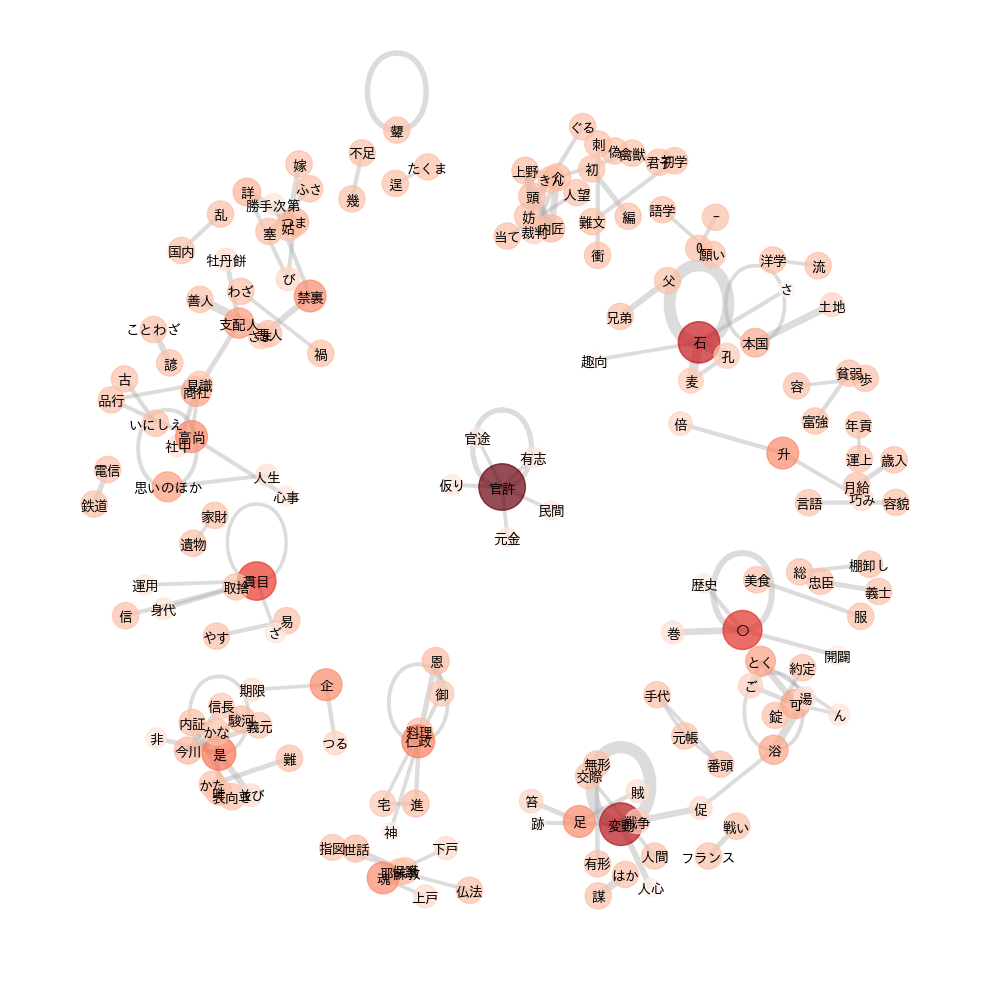

In [20]:
n_word_lower = 50
edge_threshold=0.025

plot_data = jaccard_coef_data.query(
    'count1 >= {0} and count2 >= {0}'.format(n_word_lower)
).rename(
    columns={'word1': 'node1', 'word2': 'node2', 'jaccard_coef': 'weight'}
)

plot_network(
    data=plot_data,
    edge_threshold=edge_threshold,
    fig_size=(10, 10),
    fontsize=9,
    fontfamily='Osaka',
    coefficient_of_restitution=0.08,
    image_file_path='/co_occurence_network.png'
)

    このコードセクションでは、jaccard_coef_data から count1 および count2 が n_word_lower 以上の単語の組み合わせを抽出し、それを plot_data として準備しています。
    その後、plot_network 関数を呼び出して、このデータを用いて共起ネットワークを描画しています。

    主なパラメータ:
    n_word_lower: グラフに含める単語の最小出現回数。この回数以上の出現回数がある単語だけをグラフに含めます。
    edge_threshold: エッジ（枝）の重みの下限値。この値以上の重みを持つエッジのみが描画されます。
    coefficient_of_restitution: ノード間の反発係数。
    image_file_path: グラフを画像ファイルとして保存する場合のファイルパス。
    plot_network 関数は、与えられたデータからネットワークを描画し、指定された条件に基づいてエッジをフィルタリングします。
    最終的に、/co_occurence_network.png という名前の画像ファイルが保存されることになります。

    共起ネットワークを見ると、いくつかの塊ができていることがわかります。
    単語のつながりが多いのは「官許」という単語です。
    文章全体を通して「官」に関連したことが重要であろうことが伺えます。
    エッジの太さを見ると、「変動」と「戦争」がほかと比べて太く、激動の時代に書かれた文章であることが伝わってきますね。

    まだまだ示唆を読み取れそうな気がしますが、不要な単語も見られるため、追加の前処理が必要そうです。
    ただ、一定の示唆は得られそうであり、テキストマイニングの手法としては有効ですね。

ノートブック：https://colab.research.google.com/drive/1eSXZuqO5WqcspxPe73MNSgjGwnG4jPe1?usp=sharing

## version when submitted

In [21]:
!pip install watermark

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Mon Jan 29 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.23.5
mojimoji  : 0.0.13
re        : 2.2.1
matplotlib: 3.7.1
networkx  : 3.2.1
pandas    : 1.5.3
neologdn  : 0.5.2

Watermark: 2.4.3



## 基礎から自然言語を学習するなら
https://monachanpapa-scripting.com/python-about-shizengengoshori/

https://monachanpapa-scripting.com/python-keitaisokaiseki/

https://monachanpapa-scripting.com/python-keitaisokaiseki-kawabatayasunari-yukiguni/

https://monachanpapa-scripting.com/python-mecab-dictionary-custom/

https://monachanpapa-scripting.com/python-networkx/

https://monachanpapa-scripting.com/python-ngram/

https://monachanpapa-scripting.com/marukofu-python/



## 参考
https://zenn.dev/robes/articles/a3e1a6e80efd99

https://qiita.com/y-s-y-s/items/c567117f0cf2be8c0acb

https://note.com/nymnkun/n/n8abaa21d9e88

https://qiita.com/hanon52_/items/a2000da2f70d6c14ca5b

https://minamolab.com/khcoder-python-co-occurrence-network-analysis

https://blog.since2020.jp/data_analysis/nlplot_questionnaire/

https://tkstock.site/2022/08/24/python-googlecolab-networkx-matplotlib-japanese-networkx-plot/